# Importing Dependences

In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


Reading the data

In [81]:
df = pd.read_csv('Crowd data for anomaly detection.csv')
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


# Data Preprocessing

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


In [83]:
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [84]:
df.shape

(24123, 12)

In [85]:
df.isna().sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

In [86]:
df['Acc'] = df['Acc'].fillna(df['Acc'].mean()) 


In [87]:
print(df.isnull().sum())


timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
dtype: int64


In [88]:
df.head()


,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


# Exploratory Data Analysis ans Visualization

(label2
 normal     17152
 anomaly     6971
 Name: count, dtype: int64,
 <Axes: ylabel='count'>)

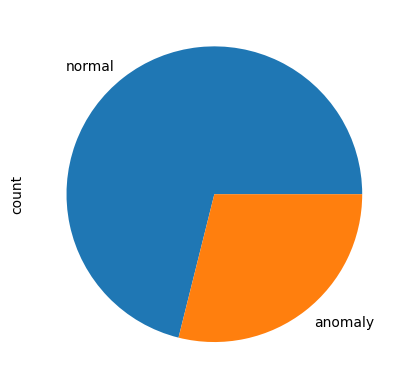

In [89]:
df['label2'].value_counts(),df['label2'].value_counts().plot(kind='pie',)

<Figure size 1500x1000 with 0 Axes>

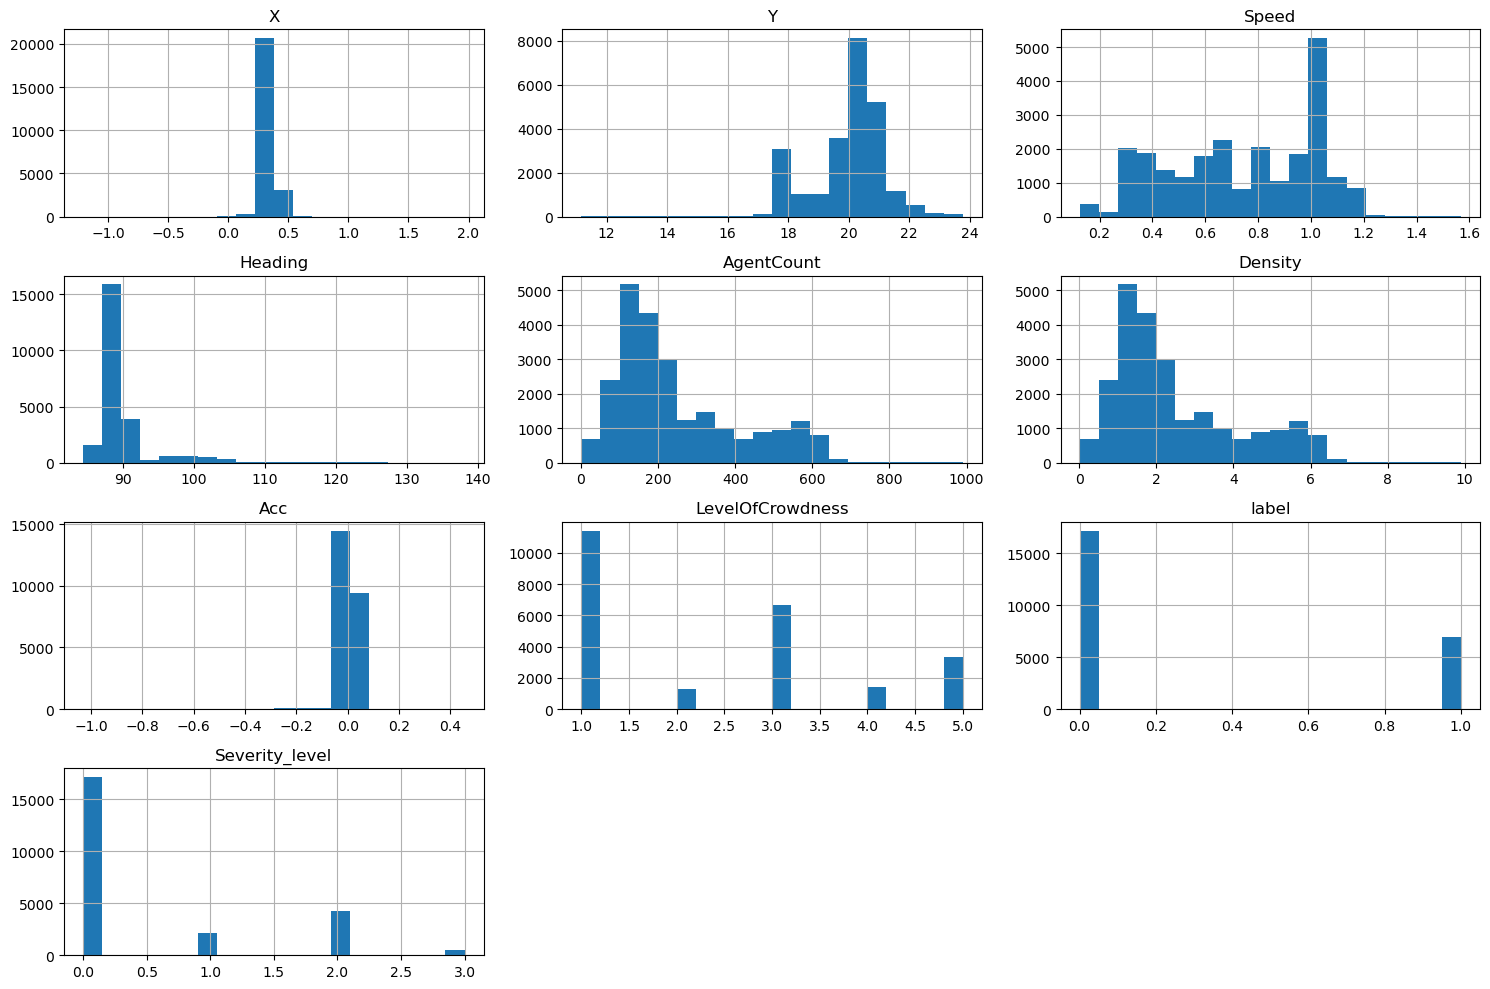

In [90]:
numeric_data = df.select_dtypes(include=[float, int])
# 1. Histograms for Numerical Features
plt.figure(figsize=(15, 10))
numeric_data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

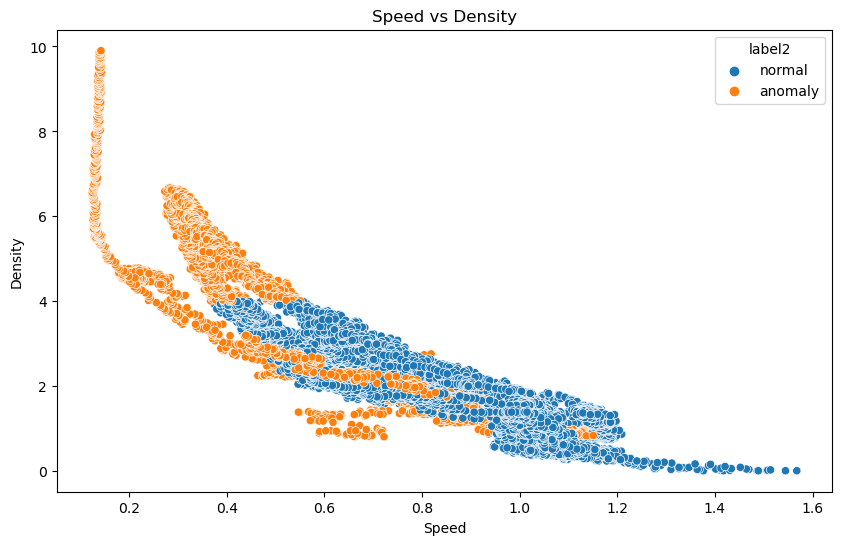

In [91]:
# Scatter plot: Speed vs Density
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Speed', y='Density', hue='label2', data=df)
plt.title('Speed vs Density')
plt.show()

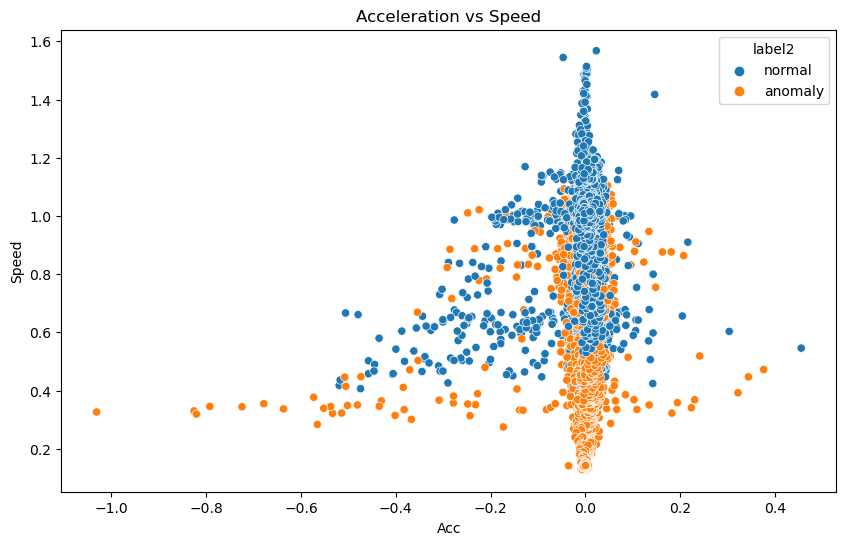

In [92]:
#Scatter plot: Acceleration vs Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acc', y='Speed', hue='label2', data=df)
plt.title('Acceleration vs Speed')
plt.show()

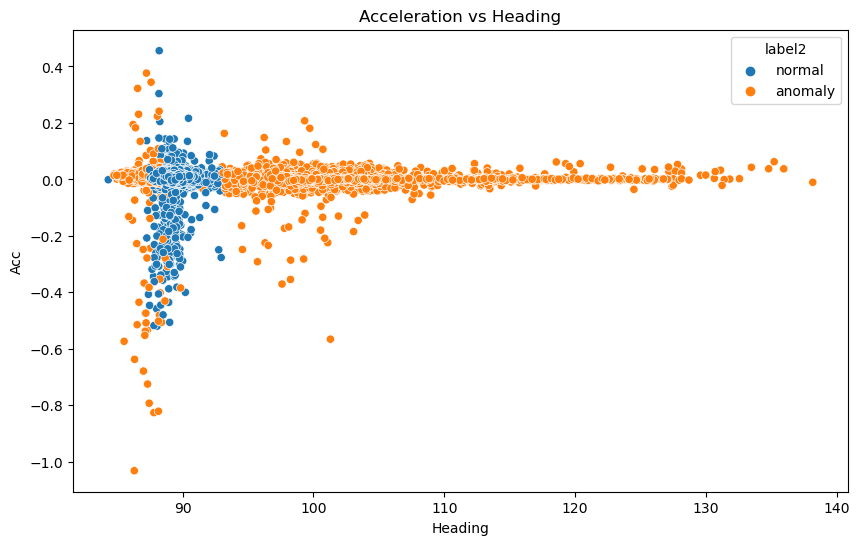

In [93]:
#Scatter plot: Acceleration vs Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heading', y='Acc', hue='label2', data=df)
plt.title('Acceleration vs Heading')
plt.show()

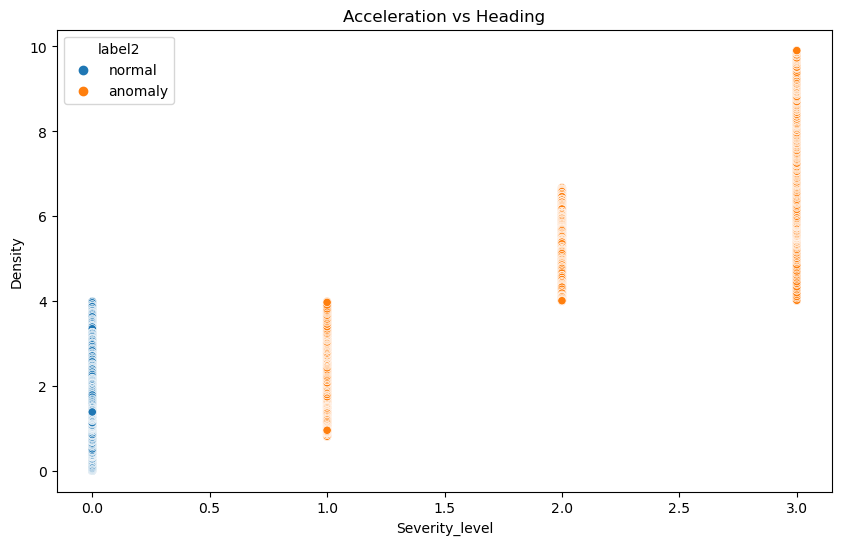

In [94]:
#Scatter plot: Acceleration vs Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Severity_level', y='Density', hue='label2', data=df)
plt.title('Acceleration vs Heading')
plt.show()

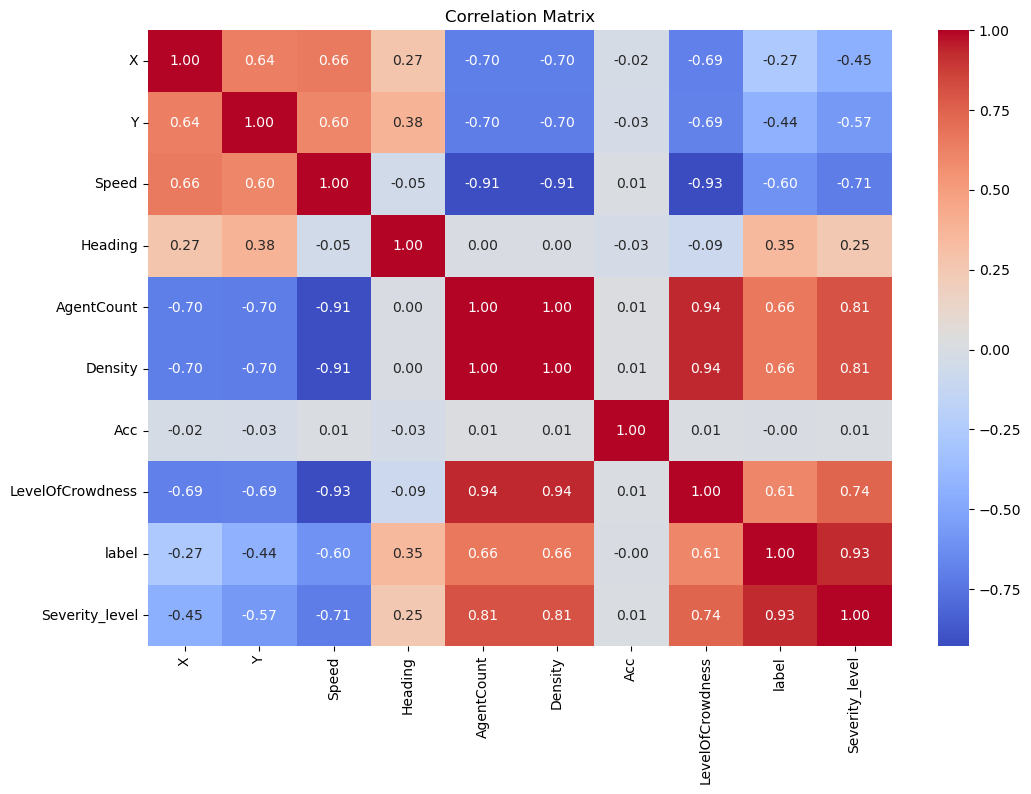

In [95]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

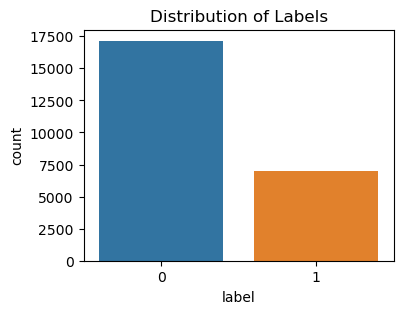

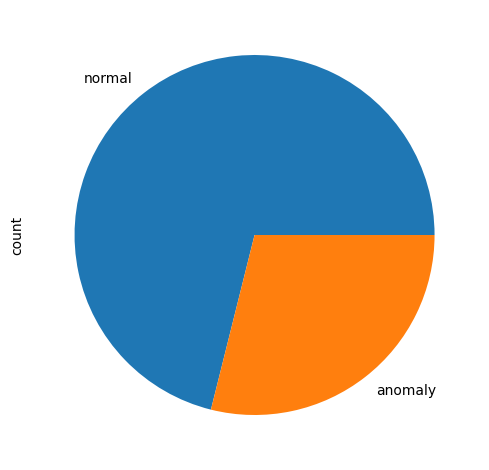

In [96]:
# Bar plot for distribution of labels
plt.figure(figsize=(4,3))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()
df['label2'].value_counts(),df['label2'].value_counts().plot(kind='pie',)
plt.tight_layout()


c:\Users\mustufa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


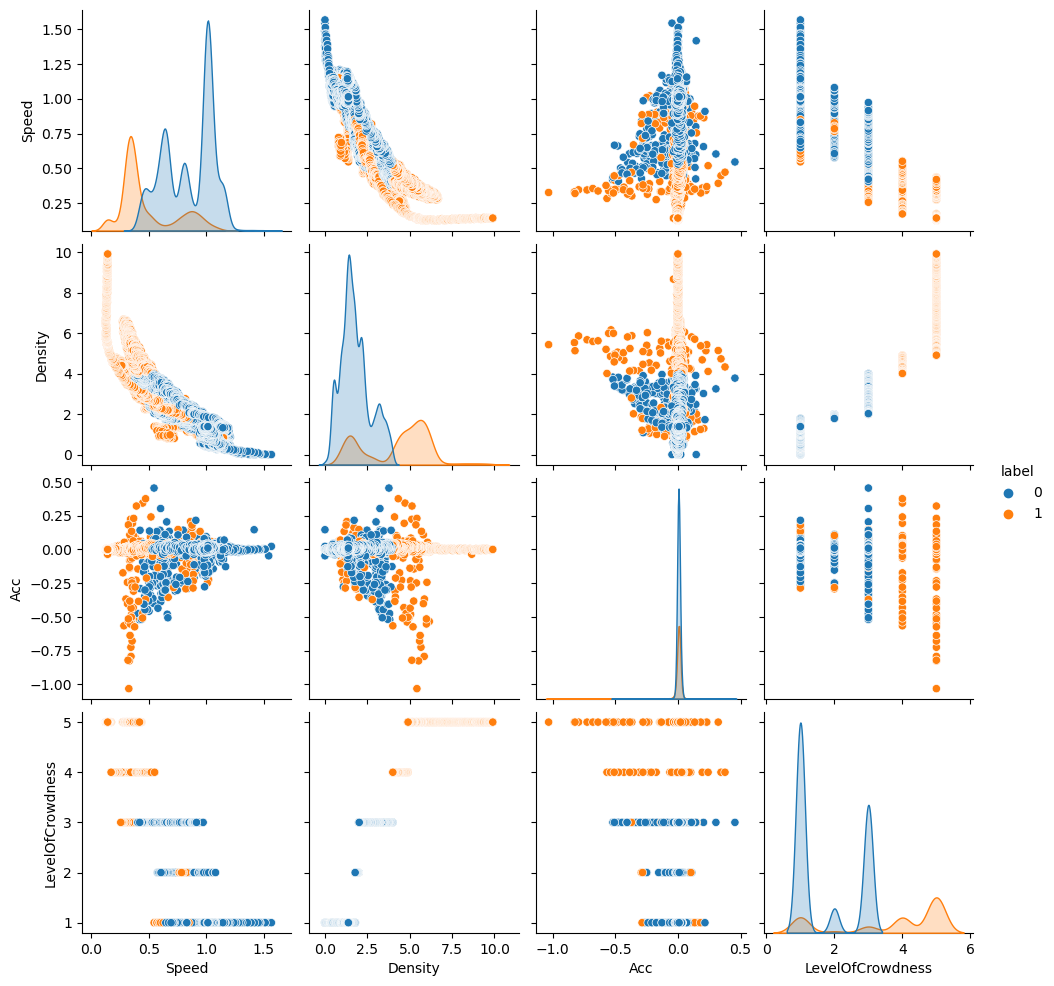

In [97]:
# Pair plot for selected features
sns.pairplot(df[['Speed', 'Density', 'Acc', 'LevelOfCrowdness', 'label']], hue='label')
plt.show()


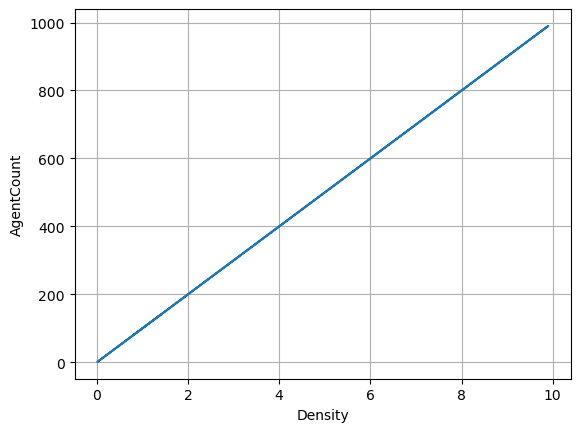

In [98]:

plt.plot(df['Density'],df['AgentCount'])
plt.xlabel('Density')
plt.ylabel('AgentCount')
plt.grid()
plt.show()

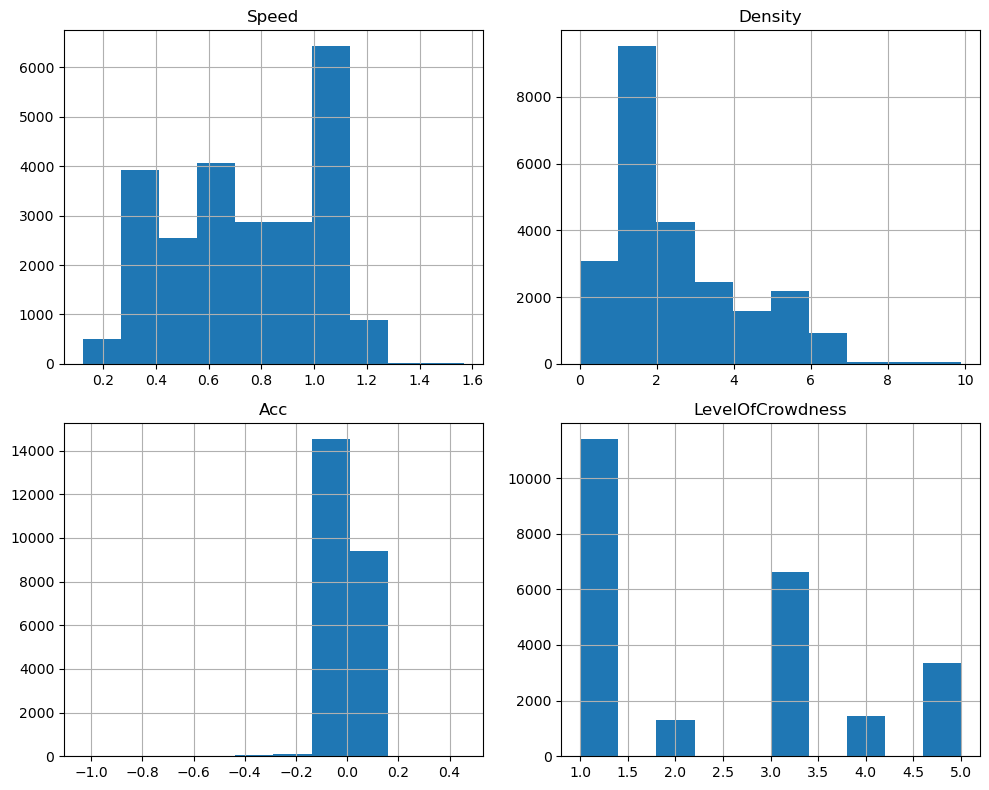

In [99]:
df[['Speed', 'Density', 'Acc', 'LevelOfCrowdness']].hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

TypeError: clustermap() missing 1 required positional argument: 'data'

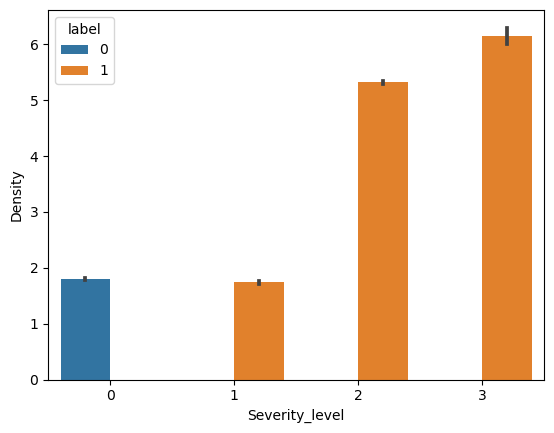

In [100]:
sns.barplot(x='Severity_level', y='Density',data=df,hue='label')
sns.clustermap()

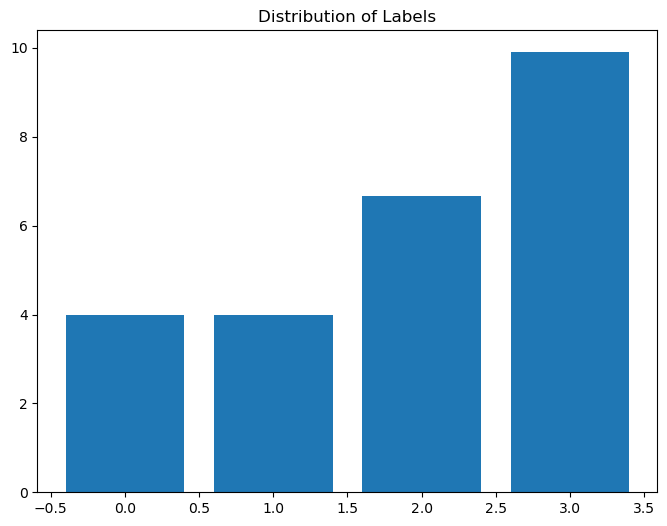

In [101]:
plt.figure(figsize=(8, 6))
plt.bar(df['Severity_level'],df['Density'])
plt.title('Distribution of Labels')
plt.show()

<Axes: xlabel='Acc'>

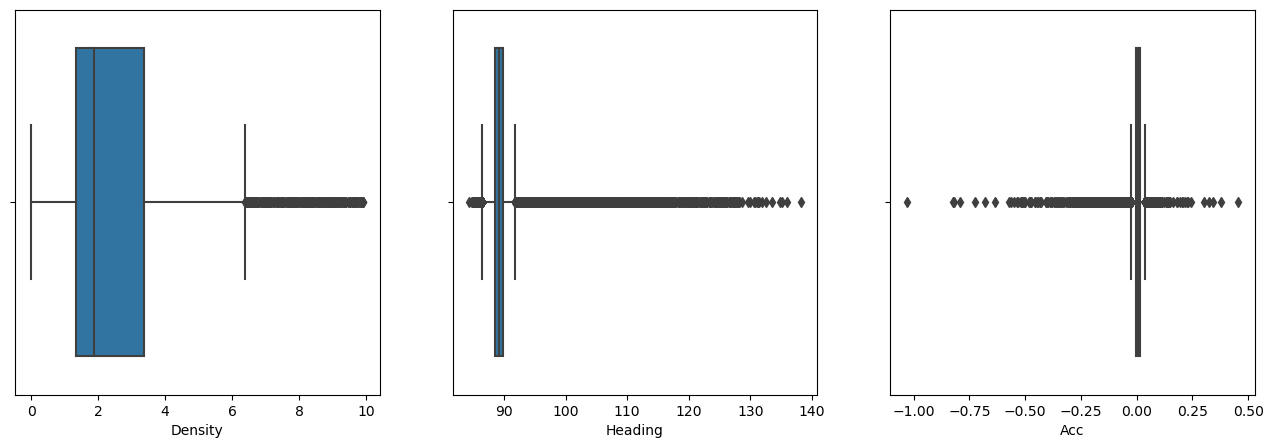

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(x=df["Density"])
plt.subplot(1,3,2)
sns.boxplot(x=df["Heading"])
plt.subplot(1,3,3)
sns.boxplot(x=df["Acc"])

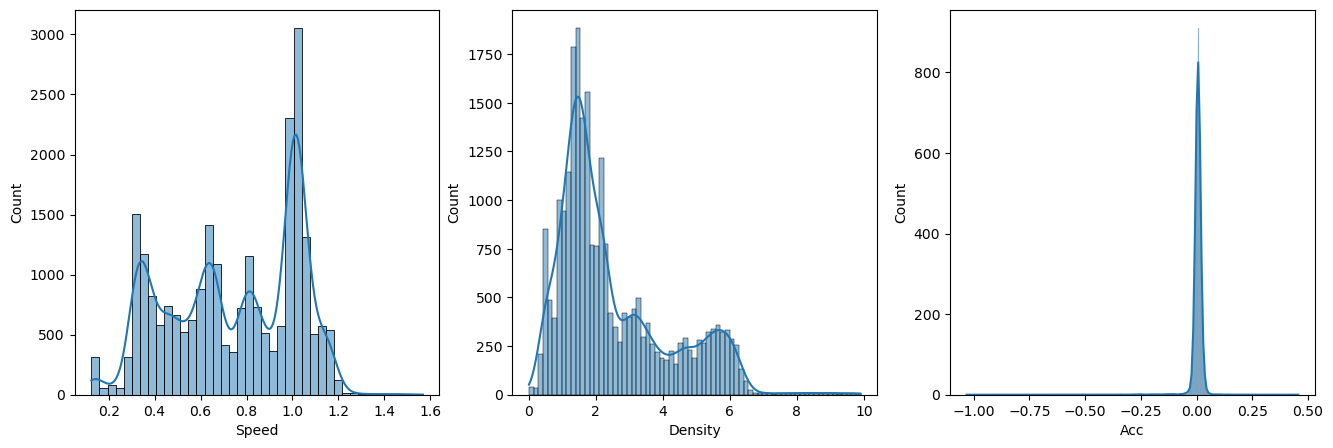

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(df['Speed'], kde=True)

plt.subplot(1,3,2)
sns.histplot(df['Density'], kde=True)

plt.subplot(1,3,3)
sns.histplot(df['Acc'], kde=True)

plt.show()

# Z score

In [103]:
outlier = []
def detect_outlier(data):

    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier

In [104]:
col = ['Speed','Heading','Density','Acc']
print('Outliers using Z-score')
for i in col:
    outlier_pt = detect_outlier(df[i])
    print(i,':',len(outlier_pt))

Outliers using Z-score
Speed : 0
Heading : 510
Density : 650
Acc : 904


[Text(0, 0, '0'), Text(0, 0, '510'), Text(0, 0, '650'), Text(0, 0, '904')]

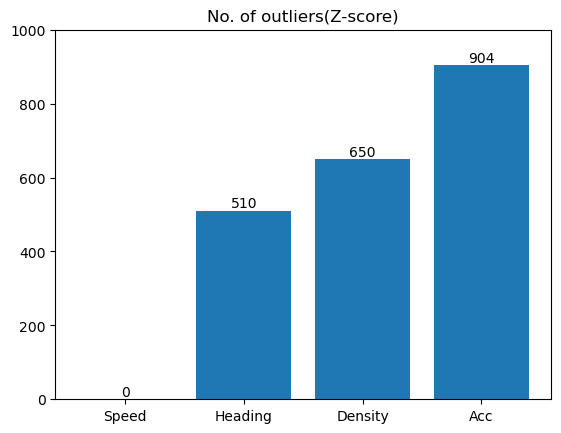

In [105]:
x = np.array(['Speed','Heading','Density','Acc'])
zscore_y = np.array([0, 510, 650, 904])

fig, ax = plt.subplots()
bar_container = ax.bar(x, zscore_y)
ax.set( title='No. of outliers(Z-score)', ylim=(0, 1000))
ax.bar_label(bar_container, fmt='{:,.0f}')

# IQR

In [106]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [107]:
colm = ['Speed','Heading','Density','Acc']
for i in colm:
    outliers = find_outliers_IQR(df[i])

    print("number of outliers in "+i+ " : " + str(len(outliers)))

    print("max outlier value in "+i+ " : " + str(outliers.max()))

    print("min outlier value in "+i+ " : " + str(outliers.min()))

number of outliers in Speed : 0
max outlier value in Speed : nan
min outlier value in Speed : nan
number of outliers in Heading : 3461
max outlier value in Heading : 138.1621
min outlier value in Heading : 84.3241
number of outliers in Density : 286
max outlier value in Density : 9.9
min outlier value in Density : 6.39
number of outliers in Acc : 857
max outlier value in Acc : 0.4555
min outlier value in Acc : -1.0313


[Text(0, 0, '0'), Text(0, 0, '3,461'), Text(0, 0, '286'), Text(0, 0, '8,570')]

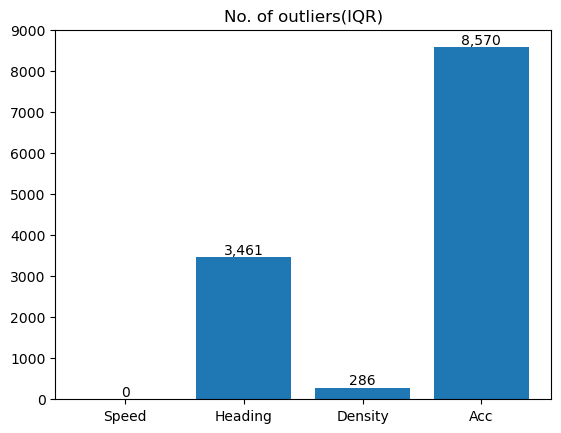

In [108]:
x = np.array(['Speed','Heading','Density','Acc'])
iqr_y = np.array([0, 3461, 286, 8570])

fig, ax = plt.subplots()
bar_container = ax.bar(x, iqr_y)
ax.set( title='No. of outliers(IQR)', ylim=(0, 9000))
ax.bar_label(bar_container, fmt='{:,.0f}')


In [109]:
print(df.isnull().sum())
print(df.columns)

timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
dtype: int64
Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')


In [111]:
X = df.drop(columns=['timestamp', 'X', 'Y', 'AgentCount',
                     'Acc','LevelOfCrowdness', 'label', 'label2', 'Severity_level'])
y = df['label'] 


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

X.head(1)

,Speed,Heading,Density
0,1.1432,89.1222,0.81


In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [114]:
# checking the oob score
classifier_rf.oob_score_

0.9999407793438352

In [116]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# %%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [117]:
grid_search.best_score_

0.9999407863571768

In [118]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [120]:
y_pred_rf = rf_best.predict(X_test)

In [122]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
cm = confusion_matrix(y_test, y_pred_rf)

In [123]:
# Perform cross-validation
cross_val_accuracy = cross_val_score(rf_best, X, y, cv=5, scoring='accuracy').mean()

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Cross-Validation Accuracy: {cross_val_accuracy}")

Accuracy: 0.9997236423932568
Precision: 0.9997237514746095
Recall: 0.9997236423932568
F1 Score: 0.9997236060214407
Cross-Validation Accuracy: 0.9998756476683937


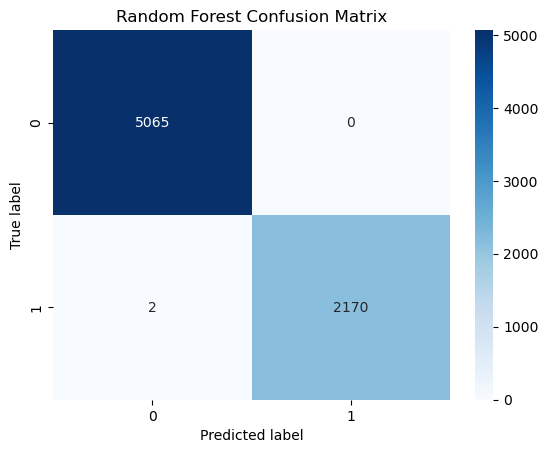

In [124]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# SVM

In [125]:
svm_model = SVC(kernel='rbf')

In [126]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [127]:
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.8s
[CV] END ..................................C=0.1, gamma=0.01; total time=   2.7s
[CV] END ..................................C=0.1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=2)

In [129]:
best_svm_model = grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

In [130]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')
cm = confusion_matrix(y_test, y_pred_svm)

# Print the best parameters and the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Best Parameters: {'C': 100, 'gamma': 1}
Accuracy: 0.9993091059831422
Precision: 0.9993092420439524
Recall: 0.9993091059831422
F1 Score: 0.9993089695237553


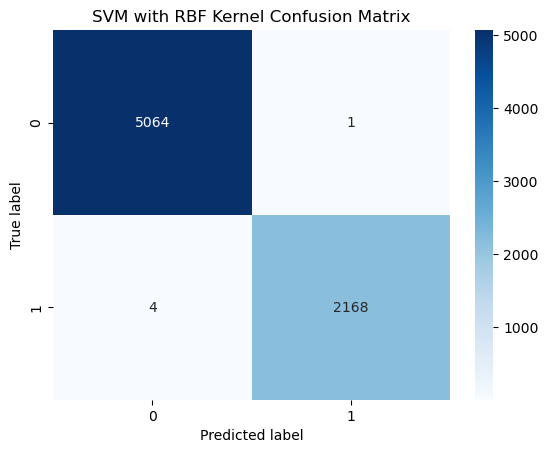

In [131]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM with RBF Kernel Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# KNN

In [132]:
from sklearn import metrics
# We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[5054   11]
 [  15 2157]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5065
           1       0.99      0.99      0.99      2172

    accuracy                           1.00      7237
   macro avg       1.00      1.00      1.00      7237
weighted avg       1.00      1.00      1.00      7237



In [133]:
from sklearn.metrics import accuracy_score


# Fit the model on the training data
classifier.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate the accuracy on the training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9985787042520431
Test Accuracy: 0.9964073511123394


In [134]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

Cross-Validation Scores: [0.99585554 0.99792715 0.99881552 0.99615043 0.99792715]
Mean Cross-Validation Score: 0.997335158096783


In [135]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data
y_pred = classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[5054   11]
 [  15 2157]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5065
           1       0.99      0.99      0.99      2172

    accuracy                           1.00      7237
   macro avg       1.00      1.00      1.00      7237
weighted avg       1.00      1.00      1.00      7237



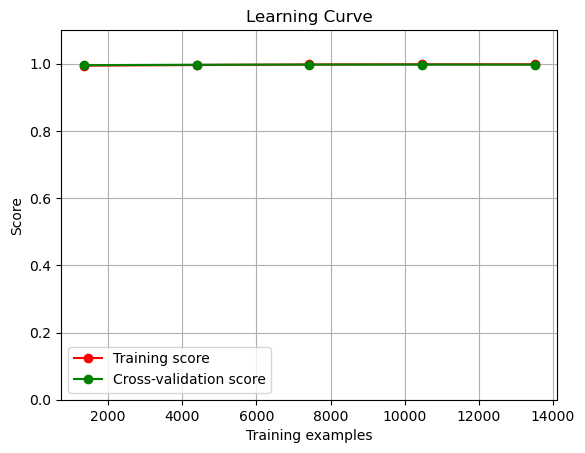

In [136]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim((0.0, 1.1))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve for the KNN model
plot_learning_curve(classifier, X_train, y_train)
plt.show()


Text(0, 0.5, 'Accuracy')

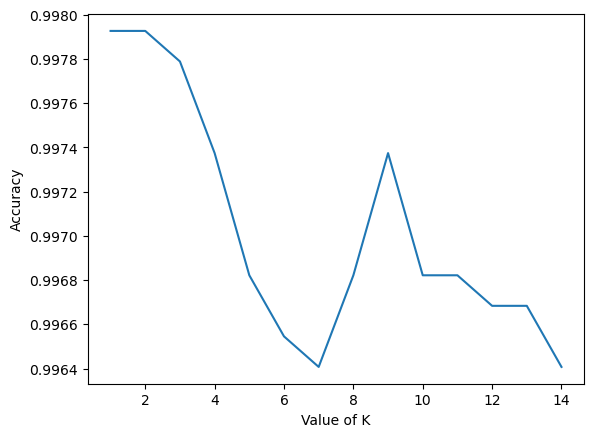

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")